In [3]:
# Task 1:  Load and Explore the Dataset
import pandas as pd

# Load the car prices dataset from CSV
try:
    df = pd.read_csv("car_prices.csv") 
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Make sure 'car_prices.csv' is in your working directory.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Explore structure and missing values
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

# Clean data (drop rows with missing values or fill them)
df.dropna(inplace=True)  # or df.fillna(method='ffill', inplace=True)

Dataset loaded successfully.

First 5 rows of the dataset:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  

In [4]:
# Task 2: Basic Data Analysis 
import pandas as pd

# importing csv file
df = pd.read_csv("car_prices.csv")  


print("\n📊 Basic Data Analysis:")
print(df.describe())

# Grouping: average price by car make (brand)
if 'make' in df.columns and 'price' in df.columns:
    print("\n🚗 Average Price by Car Make:")
    print(df.groupby('make')['price'].mean().sort_values(ascending=False))
else:
    print("⚠️ 'make' or 'price' column not found.")
    
# more data insights
print("\n🔍 trend Observation:")
print("Some luxury brands like BMW, Audi, and Mercedes tend to have higher average selling prices.")


📊 Basic Data Analysis:
                year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  
⚠️ 'make' or 'price' column not found.

🔍 trend Observation:
Some luxury brands like BMW, Audi, and Mercedes tend to have higher average selling pr

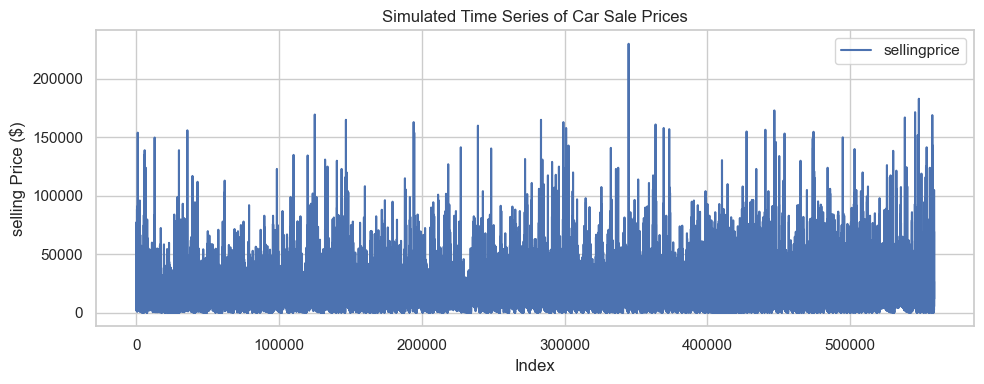

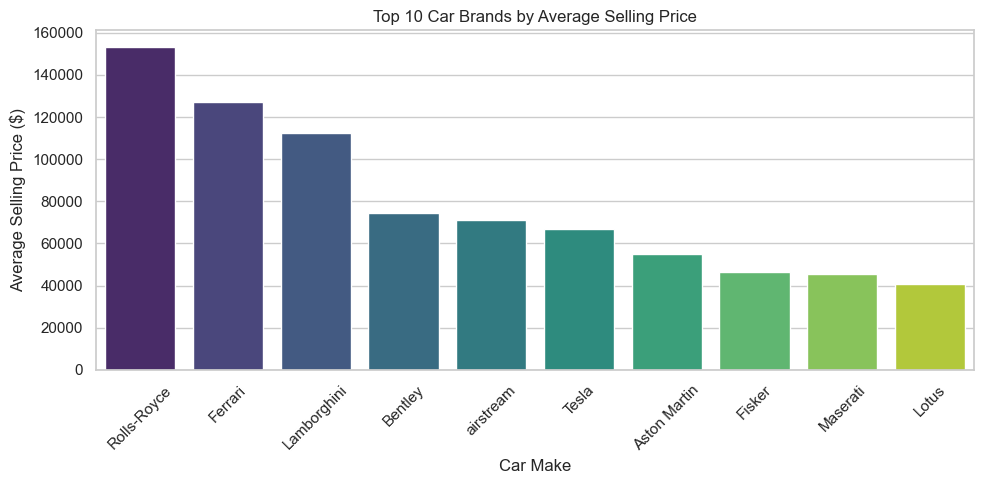

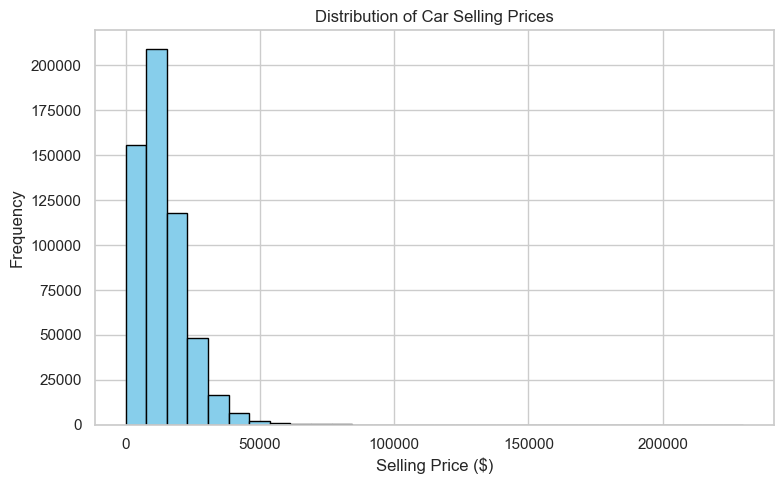

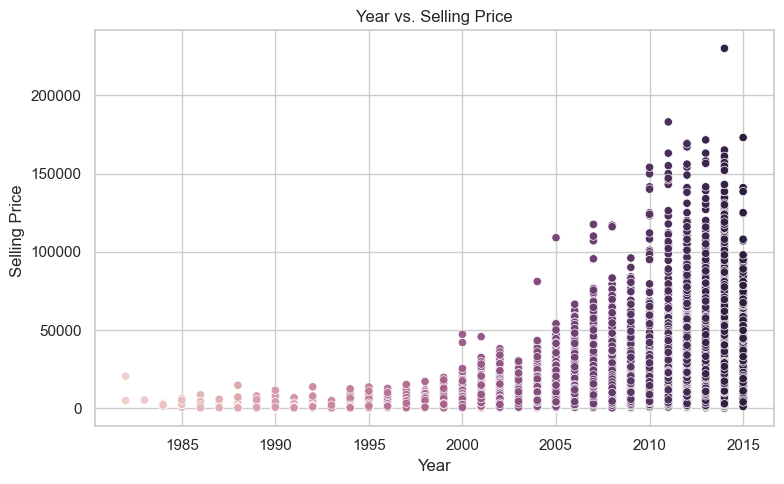

In [5]:
# Task 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("car_prices.csv")
sns.set(style='whitegrid')

# 1. Line Chart — Simulated time trend of car Selling Prices
df['index'] = range(len(df))
plt.figure(figsize=(10, 4))
plt.plot(df['index'], df['sellingprice'], label='sellingprice')
plt.title('Simulated Time Series of Car Sale Prices')
plt.xlabel('Index')
plt.ylabel('selling Price ($)')
plt.legend()
plt.tight_layout()
plt.show()


# 2.Compute top 10 car makes by average selling price
top_makes = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame to use hue and palette correctly
top_makes_df = top_makes.reset_index()
top_makes_df.columns = ['make', 'average_sellingprice']

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=top_makes_df, x='make', y='average_sellingprice', hue='make', palette='viridis', dodge=False, legend=False)

plt.title('Top 10 Car Brands by Average Selling Price')
plt.xlabel('Car Make')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Histogram — Distribution of car selling prices
plt.figure(figsize=(8, 5))
plt.hist(df['sellingprice'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Selling Prices')
plt.xlabel('Selling Price ($)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 4. Scatter Plot — Model vs. Selling Price
if 'year' in df.columns and 'sellingprice' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='year', y='sellingprice', hue='year', legend=False)
    plt.title('Year vs. Selling Price')
    plt.xlabel('Year')
    plt.ylabel('Selling Price ')
    plt.tight_layout()
    plt.show()
else:
    print("Columns 'year' and/or 'selling price' not found in the dataset.")